In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#from scipy.special import binom
import pandas as pd
#import math
#import pickle
#import statsmodels.stats.power
import statsmodels.api as sm
#import statsmodels.stats.multitest as mt
#from sklearn import datasets
from sklearn.metrics import mean_squared_error

# Galton dataset

In [20]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


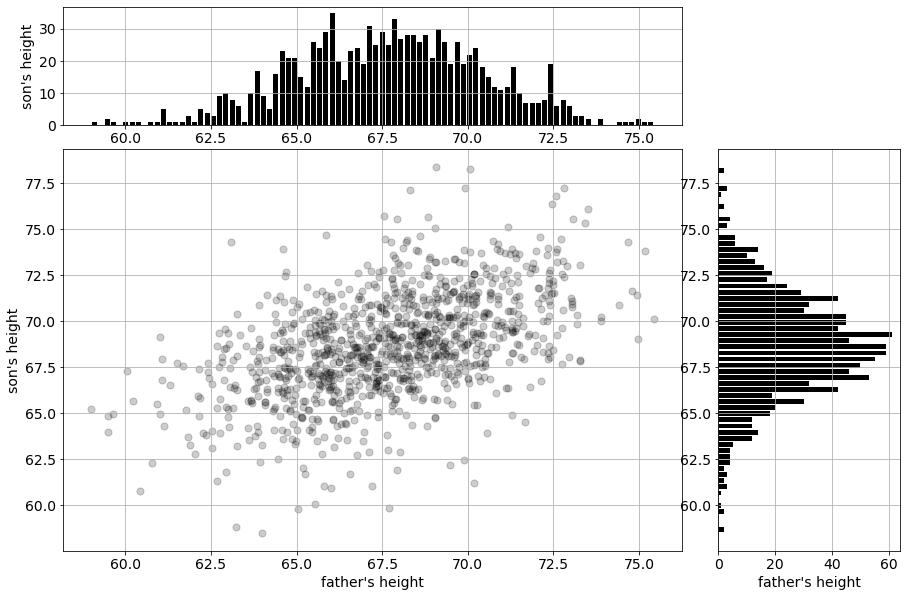

In [21]:
# see https://stackoverflow.com/questions/37008112/matplotlib-plotting-histogram-plot-just-above-scatter-plot

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams.update({'font.size': 14})

fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(fheight, sheight, c='k', alpha = .2, s=50)
ax_main.set(xlabel="father's height", ylabel="son's height")
ax_main.grid(True)

ax_fDist.hist(fheight, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.set(ylabel="son's height")
ax_fDist.grid(True)

ax_sDist.hist(sheight, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.set(xlabel="father's height")
ax_sDist.grid(True)

plt.show()

In [22]:
x = np.random.randn(10) + 6
y = x/3 + np.random.randn(10)/1.5 - 2
x1 = np.array(range(11))

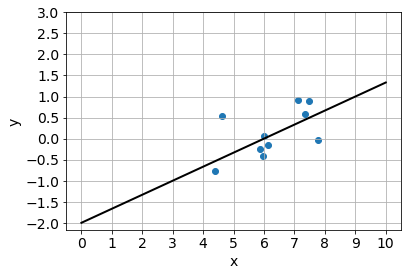

In [23]:
plt.scatter(x, y)
plt.plot(x1, x1/3 - 2, '-', c='k', lw=2)
plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

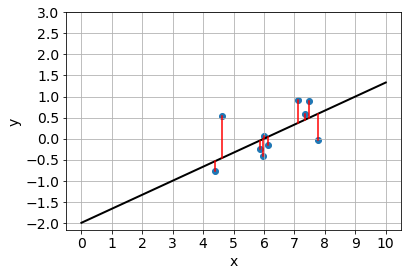

In [24]:
def f(x):
    return x/3 - 2

yf = f(x)
plt.scatter(x, y)
plt.plot(x1, f(x1), '-', c='k', lw=2)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]

plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

beta0: 33.886604354077946 beta1: 0.5140930386233071
intercept: 33.88660435407794 coefficient: 0.5140930386233095


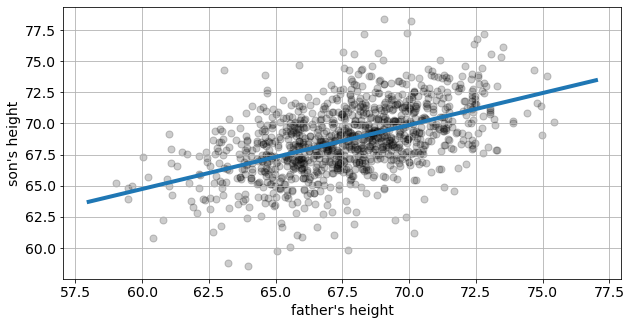

In [25]:
# see https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/

x, y = np.array(fheight), np.array(sheight)
beta1 = np.corrcoef(x, y)[0, 1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
print('beta0:', beta0, 'beta1:', beta1)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
print('intercept:', lm.params[0], 'coefficient:', lm.params[1])

x1 = np.linspace(58, 77, 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="father's height", ylabel="son's height")
ax.grid(True)
plt.show()

# Regresia catre medie

In [26]:
x = np.random.randn(10)
ordered = np.argsort(x)[::-1]

y = np.random.randn(10)

# doar in 1 caz din 11 vom obtine un numar mai mic
print(x[ordered[0]], '>', y[ordered[0]])

0.4624497623668857 > -0.523481618573232


In [27]:
# verificare
n = 10000000
x = np.random.randn(n, 10)
ordered = np.argsort(x, axis=1)
for i in range(x.shape[0]):
    x[i, :] = x[i, ordered[i][::-1]]

y = np.random.randn(n, 10)
print(np.sum(x[:, 0] < y[:, 0]) / n, 'vs. 1/11 =', 1/11)

0.0908136 vs. 1/11 = 0.09090909090909091


rho: 0.5013383111723431


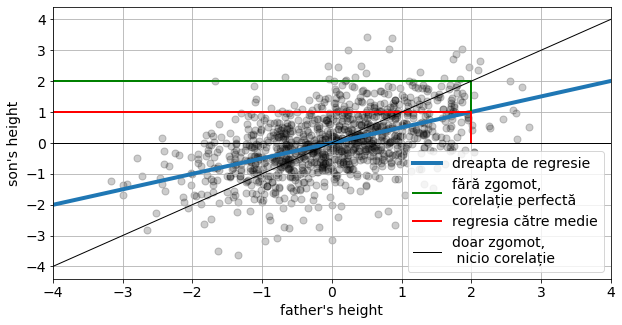

In [28]:
# originea este acum (Xbar, Ybar)
x, y = np.array(fheight), np.array(sheight)
x, y = (x - np.mean(x))/np.std(x), (y - np.mean(y))/np.std(y)
rho = np.corrcoef(x, y)[0, 1]
print('rho:', rho)

x1 = np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, rho * x1, lw=4)
ax.plot([2, 2, -4], [0, 2, 2], 'g', lw=2)
ax.plot([2, 2, -4], [0, 1, 1], 'r', lw=2)
ax.plot(x1, x1, lw=1, c='k')
ax.plot(x1, [0] * len(x1), lw=1, c='k')
ax.legend(['dreapta de regresie', 'fără zgomot,\ncorelație perfectă', 'regresia către medie', 
           'doar zgomot,\n nicio corelație'])
ax.set(xlabel="father's height", ylabel="son's height", xlim=(-4, 4))
ax.grid(True)
plt.show()

# Laborator

Q1. Considerăm setul $X = \{0.725, 0.429, -0.372, 0.863\}$. Ce valoare a lui $\mu$ minimizează $\sum_i (X_i - \mu)^2$ ? Verificați cu câteva valori în jur.

In [29]:
X = np.array([0.725, 0.429, -0.372, 0.863])

mu = (1 / len(X)) * np.sum(X)
print(mu, ':', np.sum((X - mu)**2))

for i in range(0, 5):
    mu2 = (np.random.rand() - 0.5)/ 10 + mu
    print(mu2, ':', np.sum((X - mu2)**2))

0.41125 : 0.9163127500000001
0.4180647265416475 : 0.9164985119913496
0.44392238547428414 : 0.9205826890903207
0.39168883564491463 : 0.9178433066037066
0.4160021376205612 : 0.916403081247859
0.37915755761011205 : 0.9204324494341931


Q2. Pentru problema anterioară, considerăm că se dă un set de ponderi $w = \{2, 2, 1, 1\}$. Dorim să minimizăm suma $\sum_i w_i(x-\mu)^2$. Ce valoare pentru $\mu$ obținem?

In [30]:
print(mu, ':', np.sum((X - mu)**2))

w = np.array([2, 2, 1, 1])

for i in range(0, 5):
    mu2 = (np.random.rand() - 0.5)/ 10 + mu
    print(mu2, ':', np.sum(w*((X - mu2)**2)))

0.41125 : 0.9163127500000001
0.4372036253927161 : 1.001901165390782
0.425602370306446 : 1.0067871966873063
0.4461844388559326 : 0.99922783214759
0.4577170155251426 : 0.9972143448977133
0.3692814887295242 : 1.0534601336018858


Q3. Pentru setul Galton (fathers.sons):
    
a) găsiți media, deviația standard și corelația dintre înălțimile părinților și cele ale fiilor.

In [31]:
father_son = pd.read_csv('father_son.csv')

fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

print('Media parintilor:', np.mean(fheight))
print('Media fiilor:', np.mean(sheight))
print('Deviatia standard a parintilor:', np.std(fheight))
print('Deviatia standard a fiilor:', np.std(sheight))
print('COrelatia:', np.corrcoef(fheight, sheight)[0, 1])

Media parintilor: 67.68709686456401
Media fiilor: 68.68406965677178
Deviatia standard a parintilor: 2.743594987591043
Deviatia standard a fiilor: 2.8133957698626495
COrelatia: 0.5013383111723428


b) centrați variabilele pentru fii și părinți și verificați că variabilele centrate au media 0.

In [32]:
print(np.round(np.mean(fheight - np.mean(fheight))))
print(np.round(np.mean(sheight - np.mean(sheight))))

-0.0
0.0


c) realizați același lucru pentru deviația standard și verificați că ea devine 1.

In [33]:
sigma_f = (1 / (len(fheight) - 1)) * (np.sum(np.square(fheight - np.mean(fheight))))
sigma_s = (1 / (len(sheight) - 1)) * (np.sum(np.square(sheight - np.mean(sheight))))

print(np.round(np.std((fheight - np.mean(fheight))/np.sqrt(sigma_f))))
print(np.round(np.std((sheight - np.mean(sheight))/np.sqrt(sigma_s))))

1.0
1.0


d) realizați procedura completă de normalizare (centrare + scalare) și verificați $N(0, 1)$.

In [34]:
print(np.round(np.mean((fheight - np.mean(fheight))/np.sqrt(sigma_f))))
print(np.round(np.mean((sheight - np.mean(sheight))/np.sqrt(sigma_s))))

-0.0
0.0


Q4. Considerăm un dataset pentru care deviația standard a variabilei prezise este dublu față de deviația standard a predictorului său. Variabilele au o corelație de 0.3. Dacă potrivim un model de regresie liniară, care va fi panta estimată?

In [38]:
predictor = np.array(sheight)
predict   = 2 * predictor

correlation = 0.3
slope = correlation * (np.std(predict) / np.std(predictor))
print('slope:', slope)

slope: 0.6


Q5. Pentru problema anterioară, variabila prezisă are o medie 1 iar predictorul o medie de 0.5. Care este intercept-ul?

In [39]:
predictor_mean = 0.5
predict_mean   = 1

print('intercept:', np.round(predictor_mean - slope * predict_mean, 4))

intercept: -0.1


Q6. Avem două cântare care au asociat zgomot, și mai mulți oameni pe care vrem să-i cântărim. Vom cântări fiecare persoană pe ambele cântare. Corelația este de 0.75. Fiecare set de măsurători este normalizat. Masa cuiva este la 2 deviații standard peste medie în primul grup de cântăriri. La câte deviații standard față de medie estimăm că este masa corespondentă în al doilea grup?

In [40]:
correlation = 0.75
first_group_std = 2

print('second group deviation:', correlation * first_group_std)

second group deviation: 1.5


Q7. Considerăm următorul dataset, în care încercăm să prezicem Y pe baza lui X:

In [41]:
x = [8.63, 11.23, 9.73, 11.89, 10.25, 14.12, 11.24, 13.59, 13.86, 13.09, 12.05, 13.46, 13.45, 12.71, 15.08, 14.93,
     14.6, 15.73, 15.39, 16.37, 17.65, 15.44, 17.62, 17.44, 16.63, 17.23, 19.07, 19.19, 19.71, 18.39, 18.68, 19.09,
     19.71, 20.52, 19.49, 21.85, 20.3, 22.38, 20.81, 20.44, 21.09, 21.85, 22.09, 22.75, 23.8, 21.03, 25.08, 23.51,
     25.67, 25.01]
y = [15.61, 16.89, 17.24, 15.41, 17.03, 16.56, 17.26, 17.84, 20.56, 21.95, 20.54, 18.66, 20.98, 22.22, 22.39, 
     21.91, 22.17, 23.83, 24.19, 24.7, 25.92, 25.78, 23.4, 26.36, 25.68, 26.02, 27.42, 26.92, 27.81, 30.12, 29.2,
     30.63, 28.79, 30.07, 30.94, 32.35, 31.85, 30.93, 32.34, 33.28, 33.02, 32.9, 34.53, 34.57, 34.66, 34.48, 36.12,
     35.53, 37.56, 36.58]

a) determinați media și deviația standard pentru fiecare set X și Y;

In [42]:
print('x mean:', np.mean(x))
print('y mean:', np.mean(y))
print()
print('x std:', np.std(x))
print('y std:', np.std(y))

x mean: 17.4984
y mean: 26.473999999999997

x std: 4.321086141238103
y std: 6.381005249958662


b) reprezentați printr-un scatterplot Y funcție de X, și pe laturi densitățile de probabilitate pentru X și Y (aveți exemplu mai sus, al treilea frame, sub "Galton dataset");

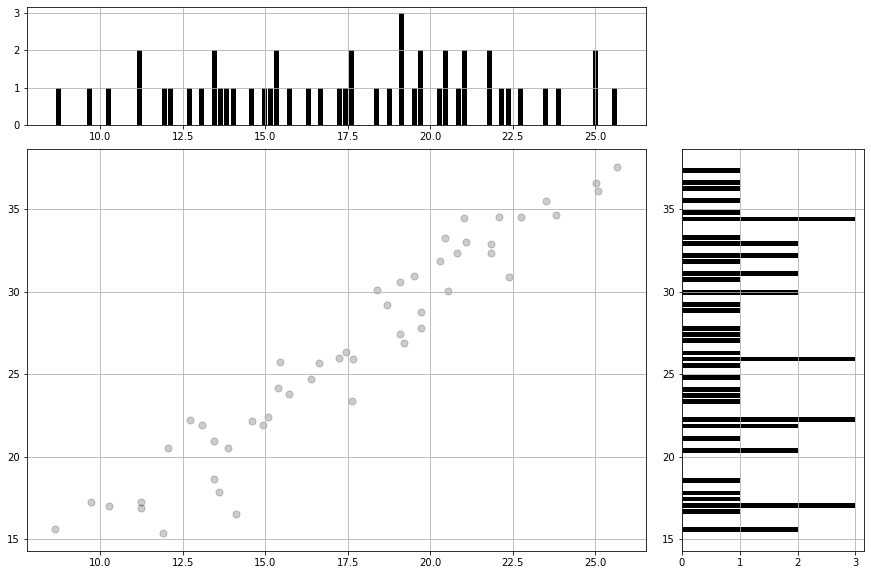

In [43]:
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3], sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3], sharey=ax_main)
ax_main.scatter(x, y, c='k', alpha=.2, s=50)
ax_main.grid(True)
ax_fDist.hist(x, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.grid(True)
ax_sDist.hist(y, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.grid(True)
plt.show()

c) determinați coeficientul de corelație dintre cele două seturi;

In [44]:
print(np.corrcoef(x, y)[0,1])

0.9638387722596927


d) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea zero (sau cât mai apropiat de zero); reprezentați într-un scatter plot;

Coef de corelatie: 0.0


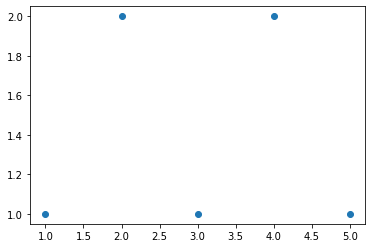

In [45]:
x_d = np.array([1, 2, 3, 4, 5])
y_d = np.array([1, 2, 1, 2, 1])

print('Coef de corelatie:', np.corrcoef(x_d, y_d)[0,1])

plt.scatter(x_d, y_d)
plt.show()

e) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea 1, fără ca seturile să fie identice; reprezentați într-un scatter plot;

Coef de corelatie: 0.9999999999999999


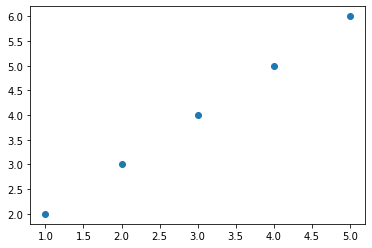

In [46]:
x_e = np.array([1, 2, 3, 4, 5])
y_e = np.array([2, 3, 4, 5, 6])

print('Coef de corelatie:', np.corrcoef(x_e, y_e)[0,1])

plt.scatter(x_e, y_e)
plt.show()

f) determinați corelația pentru problema inițială, precum și intercept-ul. Calculați dreapta de regresie prin cele două metode (manual și cu metoda statmodels.OLS), și reprezentați-o.

Q8. Folosiți setul mtcars.csv. Realizați o regresie liniară cu consumul (miles per gallon) ca variabilă prezisă pe baza puterii motorului (horsepower). Realizați scatter plot-ul și trasați dreapta de regresie. Care este eroarea pătratică medie (RMS) dintre valorile de consum reale și valorile prezise?

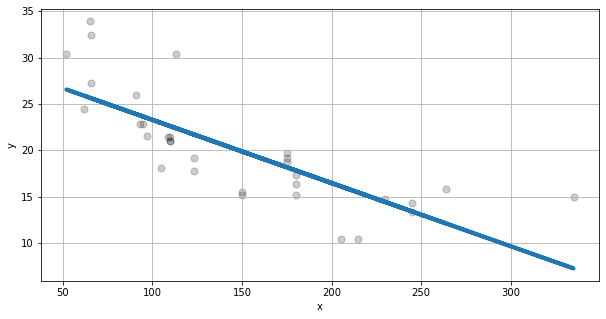

RMS: 3.7402970868994894


In [50]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()
y = mtcars['mpg'].values
x = mtcars['hp'].values
beta1 = np.corrcoef(x,y)[0,1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
y1 = beta1*x+beta0
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x, y1, lw=4)
ax.set(xlabel="x", ylabel="y")
ax.grid(True)
plt.show()


print("RMS:", np.sqrt(mean_squared_error(y,y1)))